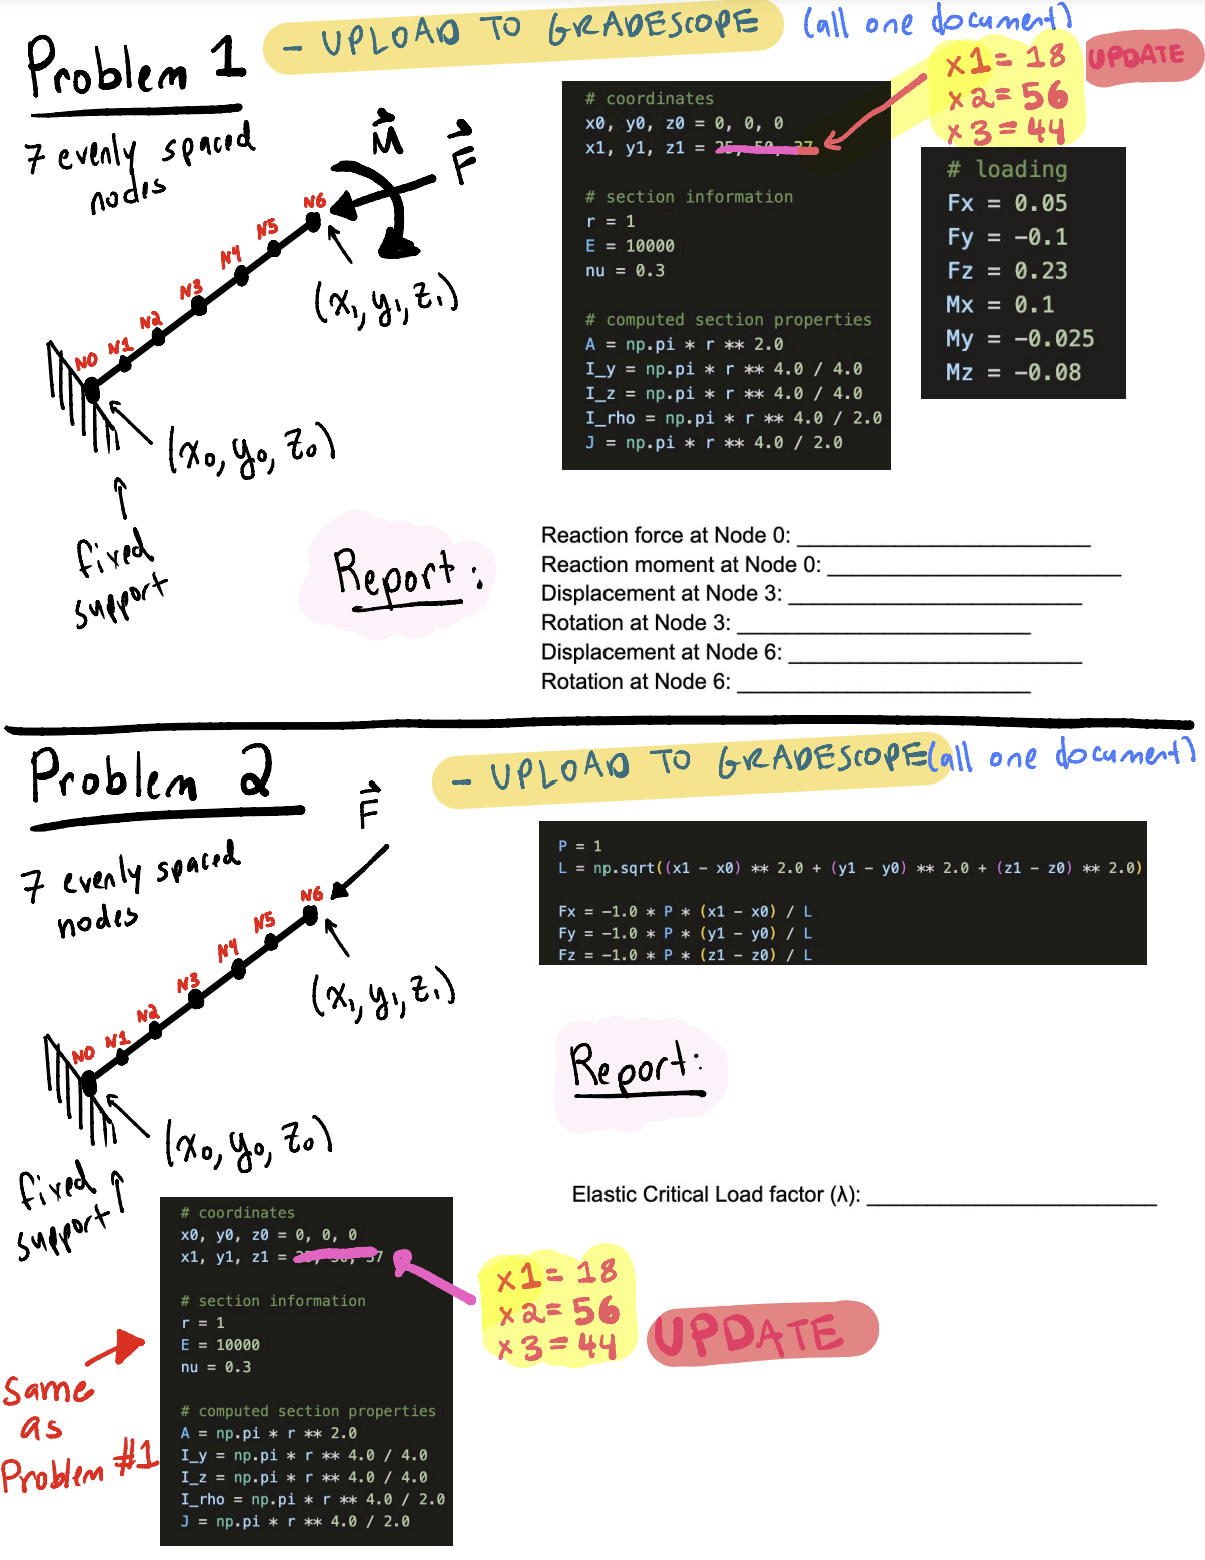

In [ ]:
#second try problem 1

from Scripts import direct_stiffness as ds
import math as mt
import numpy as np
import scipy as sc


#enter x, y , z coordinates as a row for each node
#the first row will be considered node 1 and so on

x_vec = np.linspace(0,18,7)
y_vec = np.linspace(0,56,7)
z_vec = np.linspace(0,44,7)


node_cordinates = np.matrix([[x_vec[0],y_vec[0],z_vec[0]],
                            [x_vec[1],y_vec[1],z_vec[1]],
                            [x_vec[2],y_vec[2],z_vec[2]],
                            [x_vec[3],y_vec[3],z_vec[3]],
                            [x_vec[4],y_vec[4],z_vec[4]],
                            [x_vec[5],y_vec[5],z_vec[5]],
                            [x_vec[6],y_vec[6],z_vec[6]]])

#enter nodal forces/torques for each node as a row (Fx, Fy, Fx, Mx, My, Mz)
#the first row will be considered node 1 and so on
node_force = np.matrix([[0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0.05,-0.1,0.23,0.1,-0.025,-0.08]])

#enter nodal degrees of freedom for each node as a row (x,y,z,rot_x,rot_y,rot_z)
#0 for constrained and 1 for free
#the first row will be considered node 1 and so on
node_DOF = np.matrix([[0,0,0,0,0,0],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                     [1,1,1,1,1,1],
                     [1,1,1,1,1,1]])

member_localz = np.array([0,0,0,0,0,0,0], dtype=object)


#enter member properties and connecting nodes E, nu, A, Iy, Iz, J, 1, 2
#the first row will be considered member A, the second row will be member B and so on
r = 1
E = 10000
nu = .3
A = np.pi*r**2
Iy = (np.pi*r**4)/4
Iz = (np.pi*r**4)/4
Irho = (np.pi*r**4)/2
J = (np.pi*r**4)/2





members = np.matrix([[E, nu, A, Iy, Iz, Irho, J, 1, 2],    #member E0
                     [E, nu, A, Iy, Iz, Irho, J, 2, 3],    #member E1
                     [E, nu, A, Iy, Iz, Irho, J, 3, 4],    #member E2
                     [E, nu, A, Iy, Iz, Irho, J, 4, 5],    #member E3
                     [E, nu, A, Iy, Iz, Irho, J, 5, 6],     #member E4
                     [E, nu, A, Iy, Iz, Irho, J, 6, 7]])     #member E5



F_global = np.zeros((len(node_DOF)*6, 1))  # 24x1 zero matrix    
DOF_global = np.zeros((len(node_DOF)*6, 1))  # 24x1 zero matrix

for i in range(len(node_force)):  
    F_global[i*6:i*6+6, 0] = node_force[i].flatten()

for i in range(len(node_DOF)):  
    DOF_global[i*6:i*6+6, 0] = node_DOF[i].flatten()



K_global = ds.global_stiffness_mat(members,node_cordinates, member_localz)

displacements, reaction_forces, K_reduced = ds.solve_for_displacements_and_reactions(K_global, F_global, node_DOF)

internal_forces = np.array(ds.compute_internal_forces(members, node_cordinates, member_localz, displacements))

Kg_global =   ds.global_3D_stiffness_mat(members,node_cordinates, member_localz, internal_forces)

Kg_reduced = ds.solve_for_Kg_global_ff(Kg_global, F_global, node_DOF)

eigenvalues, eigenvectors = ds.solve_gen_eig(K_reduced,Kg_reduced)


DOF_describe = [["Fx"],["Fy"],["Fz"],["Mx"],["My"],["Mz"]]
Full_DOF_describe = np.vstack([DOF_describe] * len(node_DOF))




print("Displacement of Nodes (x, y, z, rotation_x, rotation_y, rotation_z")
for i in range(len(node_DOF)):
    print("Node", i)
    print(displacements[i*6:i*6+6])

print("Reaction forces (at constrained DOFs):")
for i in range(len(DOF_global)):
    if DOF_global[i] == 0:
        node = mt.floor(i/6)
        print("Node", node, Full_DOF_describe[i], reaction_forces[i])
        

#print(eigenvalues)
print("Critical Force")
print(min([num for num in eigenvalues if num > 0], default=None))
        


## 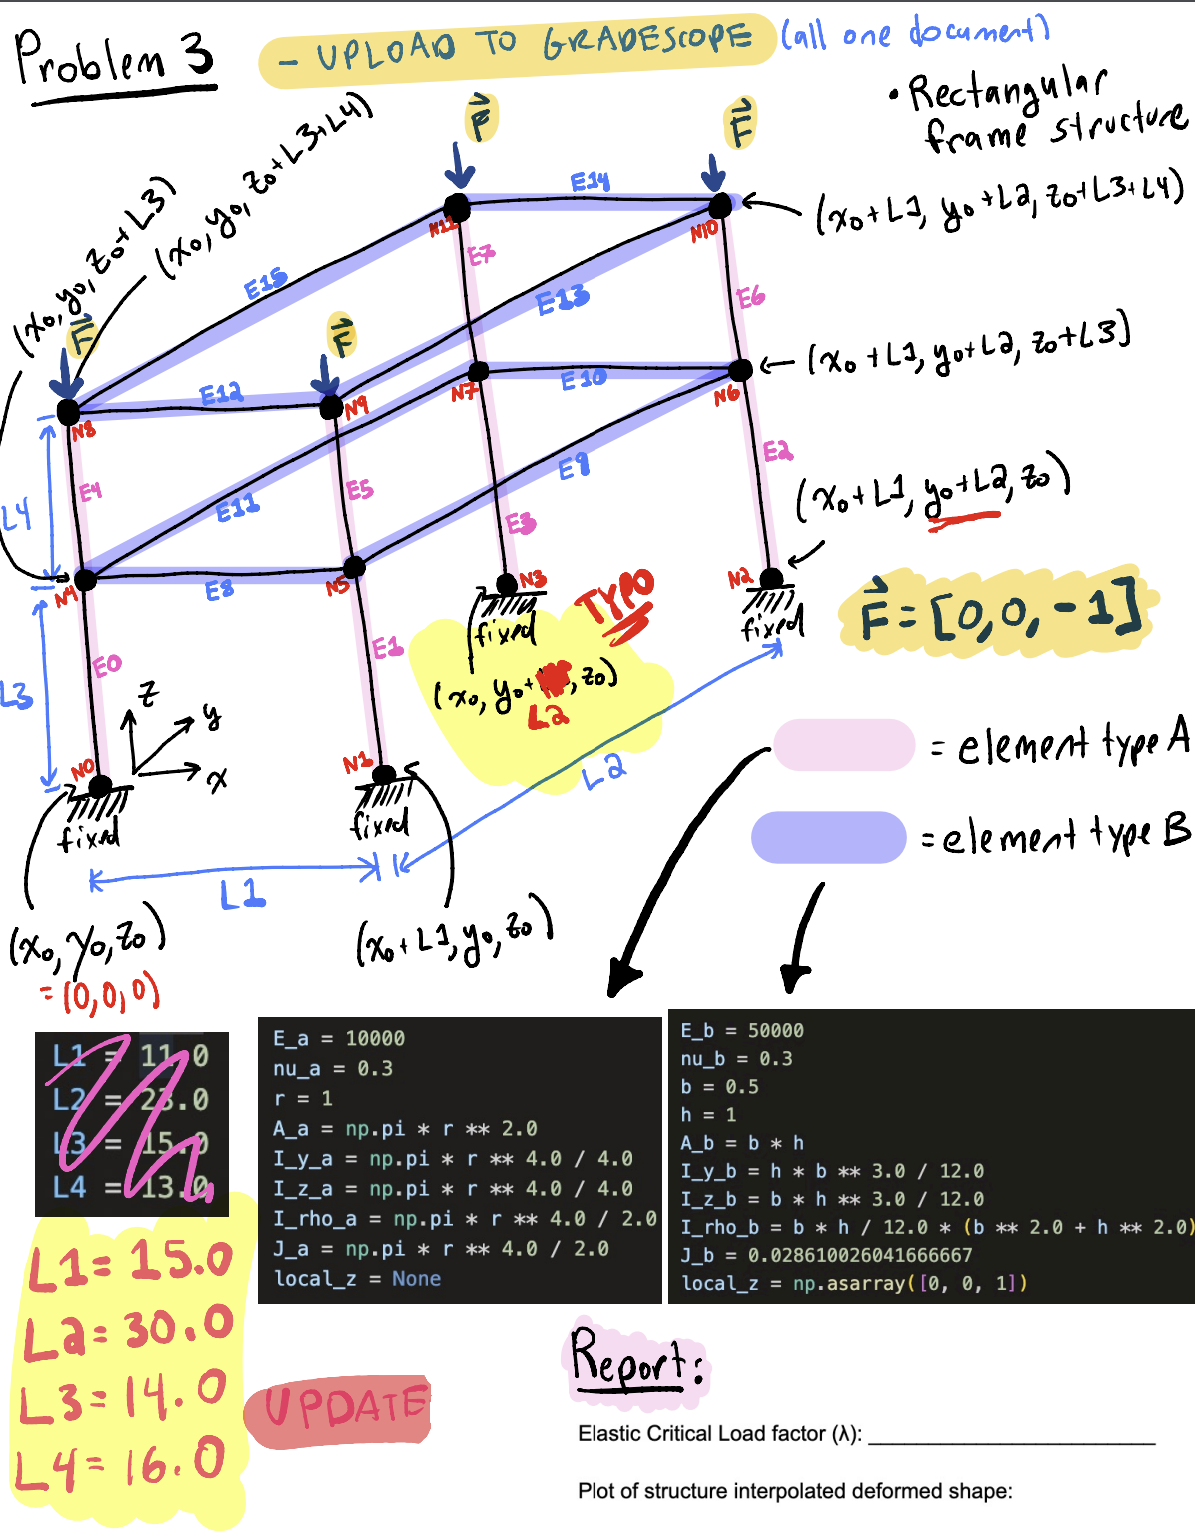

In [ ]:
#second try problem 2

from Scripts import direct_stiffness as ds
import math as mt
import numpy as np
import scipy as sc


#enter x, y , z coordinates as a row for each node
#the first row will be considered node 1 and so on

L1 = 15
L2 = 30
L3 = 14
L4 = 16


node_cordinates = np.matrix([[0,0 ,0 ],
                            [L1,0 ,0 ,],
                             [L1,L2 ,0 ],
                             [0 ,L2 ,0 ],
                             [0 ,0 ,L3 ],
                             [L1 ,0 ,L3 ],
                             [L1 ,L2 ,L3 ],
                             [0 , L2, L3],
                             [0 ,0 ,L3+L4 ],
                             [L1 ,0 , L3+L4],
                             [L1 ,L2 ,L3+L4 ],
                            [0 ,L2 , L3+L4]])

#enter nodal forces/torques for each node as a row (Fx, Fy, Fx, Mx, My, Mz)
#the first row will be considered node 1 and so on
node_force = np.matrix([[0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                       [0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                        [0,0,0,0,0,0],
                        [0,0,-1,0,0,0],
                        [0,0,-1,0,0,0],
                        [0,0,-1,0,0,0],
                       [0,0,-1,0,0,0]])

#enter nodal degrees of freedom for each node as a row (x,y,z,rot_x,rot_y,rot_z)
#0 for constrained and 1 for free
#the first row will be considered node 1 and so on
node_DOF = np.matrix([[0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                      [1,1,1,1,1,1],
                     [1,1,1,1,1,1],
                     [1,1,1,1,1,1]])

member_localz = np.array([0,0,0,0,0,0,0,0,[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]], dtype=object)


#enter member properties and connecting nodes E, nu, A, Iy, Iz, J, 1, 2
#the first row will be considered member A, the second row will be member B and so on
r = 1
E_a = 10000
nu_a = .3
A_a = np.pi*r**2
Iy_a = (np.pi*r**4)/4
Iz_a = (np.pi*r**4)/4
Irho_a = (np.pi*r**4)/2
J_a = (np.pi*r**4)/2

b = .5
h = 1
E_b = 50000
nu_b = .3
A_b = b*h
Iy_b = (h * b**3)/12
Iz_b = (b * h**3)/12
Irho_b = (b*h)/(12*(b**2+h**2))
J_b = .028610026041666667



members = np.matrix([[E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 1, 5],    #member E0
                     [E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 2, 6],     #member E1
                     [E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 3, 7],     #member E2
                     [E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 4, 8],     #member E3
                     [E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 5, 9],      #member E4
                     [E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 6, 10],      #member E5
                     [E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 7, 11],      #member E6
                     [E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a, 8, 12],      #member E7
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 5, 6],      #member E8
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 6, 7],     #member E9
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 7, 8],     #member E10
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 8, 5],     #member E11
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 9, 10],      #member E12
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 10, 11],      #member E13
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 11, 12],      #member E14
                     [E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b, 12, 9]])     #member E15



F_global = np.zeros((len(node_DOF)*6, 1))  # 24x1 zero matrix    
DOF_global = np.zeros((len(node_DOF)*6, 1))  # 24x1 zero matrix

for i in range(len(node_force)):  
    F_global[i*6:i*6+6, 0] = node_force[i].flatten()

for i in range(len(node_DOF)):  
    DOF_global[i*6:i*6+6, 0] = node_DOF[i].flatten()



K_global = ds.global_stiffness_mat(members,node_cordinates, member_localz)

displacements, reaction_forces, K_reduced = ds.solve_for_displacements_and_reactions(K_global, F_global, node_DOF)

internal_forces = np.array(ds.compute_internal_forces(members, node_cordinates, member_localz, displacements))

Kg_global =   ds.global_3D_stiffness_mat(members,node_cordinates, member_localz, internal_forces)

Kg_reduced = ds.solve_for_Kg_global_ff(Kg_global, F_global, node_DOF)

eigenvalues, eigenvectors = ds.solve_gen_eig(K_reduced,Kg_reduced)


DOF_describe = [["Fx"],["Fy"],["Fz"],["Mx"],["My"],["Mz"]]
Full_DOF_describe = np.vstack([DOF_describe] * len(node_DOF))




print("Displacement of Nodes (x, y, z, rotation_x, rotation_y, rotation_z")
for i in range(len(node_DOF)):
    print("Node", i)
    print(displacements[i*6:i*6+6])

print("Reaction forces (at constrained DOFs):")
for i in range(len(DOF_global)):
    if DOF_global[i] == 0:
        node = mt.floor(i/6)
        print("Node", node, Full_DOF_describe[i], reaction_forces[i])
        

#print(eigenvalues)
print("Critical Force")
print(min(eigenvalues))
